In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
import seaborn as sns

In [4]:
df_mpg = sns.load_dataset('mpg')

In [6]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df_mpg[df_mpg['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [ ]:
df_mpg['horsepower'].loc[32] = 75
df_mpg['horsepower'].loc[126] = 105
df_mpg['horsepower'].loc[330] = 51
df_mpg['horsepower'].loc[336] = 120
df_mpg['horsepower'].loc[354] = 73
df_mpg['horsepower'].loc[374] = 82

In [11]:
df_mpg['origin']

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

In [13]:
pd.get_dummies(df_mpg['origin']).head()

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
df_dummies = pd.get_dummies(df_mpg['origin'])

In [15]:
df_data = pd.concat([df_mpg, df_dummies], axis=1)

In [17]:
df_data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,europe,japan,usa
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0,0,1
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,0,0,1


In [18]:
df_data.drop(['origin', 'name'], axis=1, inplace=True)
df_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [19]:
df_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'europe', 'japan', 'usa'],
      dtype='object')

In [21]:
X = df_data[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'europe', 'japan', 'usa']]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,8,307.0,130.0,3504,12.0,70,0,0,1
1,8,350.0,165.0,3693,11.5,70,0,0,1
2,8,318.0,150.0,3436,11.0,70,0,0,1
3,8,304.0,150.0,3433,12.0,70,0,0,1
4,8,302.0,140.0,3449,10.5,70,0,0,1


In [23]:
y = df_data['mpg'] # Target

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [27]:
mpg_model = LinearRegression().fit(X_train, y_train)

In [28]:
mpg_pred = mpg_model.predict(X_test)

In [29]:
mpg_pred

array([32.5807764 , 29.11531912, 20.82468337, 16.81042998, 12.53671407,
       26.89224642, 27.46096913,  9.71898846, 17.0760993 , 21.5306433 ,
       12.55239646, 35.97375981, 24.45309969, 13.64179325, 23.33981127,
        6.42582008, 29.07341977, 25.16152699, 16.28333751, 36.13277466,
       24.85161985, 18.54208742, 28.42495262, 28.10143028, 14.80888168,
       35.98685651, 26.59945344, 24.37634664, 21.67995077,  8.83362446,
       27.96549245, 36.05109578, 20.56982898, 25.76405355, 34.06919842,
       11.88189052, 22.51551402, 21.69716135, 12.45688148, 27.88145573,
       25.93878775, 28.4408266 , 21.35409858,  7.28439335, 24.25967981,
       34.75785888, 27.84102343, 25.38400728, 23.61343313, 28.72129644,
       21.97440896, 33.44984508, 32.52325432, 10.88379546, 27.44117061,
        9.91298837, 19.76560359, 29.76634903, 22.4060054 , 20.17165045,
       16.02114488, 31.77642227, 23.4149797 , 21.7584608 , 20.55449373,
       25.16026886, 24.6024376 , 31.80307564, 27.49403129, 12.71

In [30]:
spejimai = pd.Series(data=mpg_pred, name="Spėjimai")

In [31]:
res = pd.concat([y_test.reset_index(), spejimai], axis=1)

In [34]:
res = res[['mpg', 'Spėjimai']]
res.head()

,mpg,Spėjimai
0,33.0,32.580776
1,28.0,29.115319
2,19.0,20.824683
3,13.0,16.810430
4,14.0,12.536714


In [33]:
mpg_model.score(X_test, y_test)

0.8463742656811793

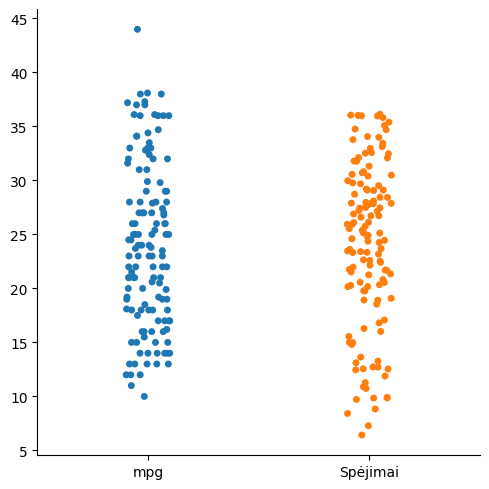

In [36]:
sns.catplot(data=res)

<AxesSubplot:>

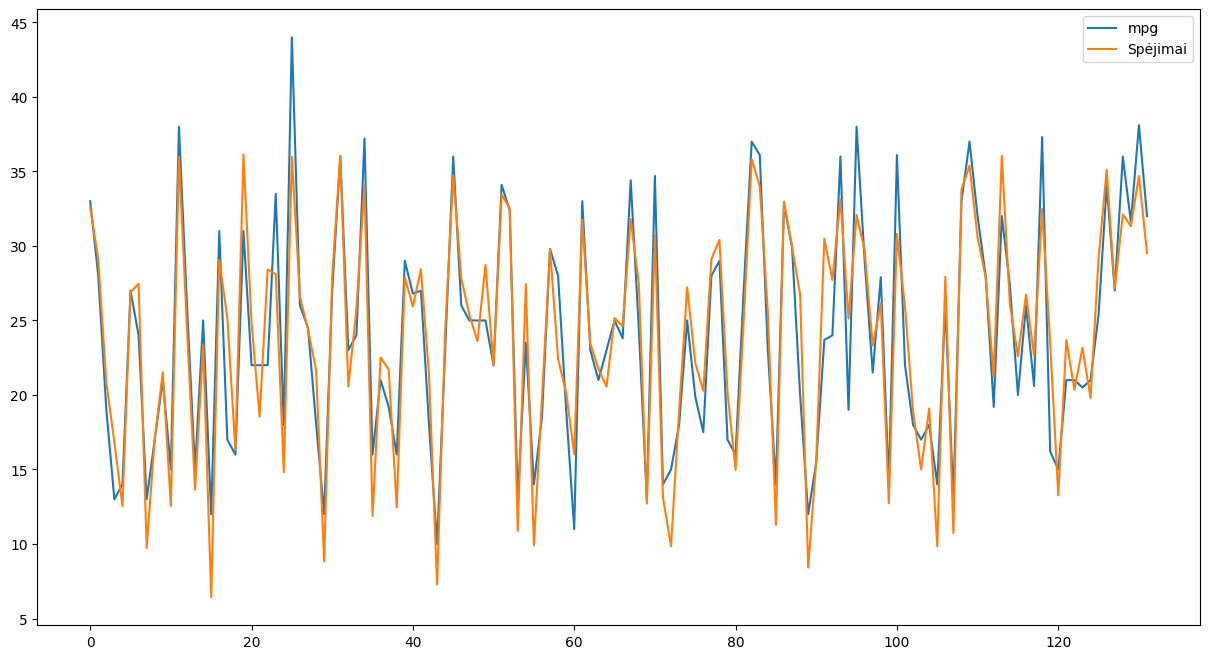

In [37]:
res.plot(figsize=(15, 8))

C:\Users\CodeAcademy\Desktop\Notebooks\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


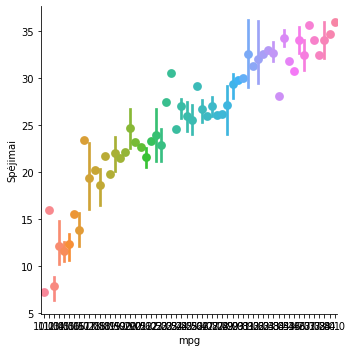

In [35]:
sns.factorplot(x='mpg', y='Spėjimai', hue='mpg', kind='point', data=res)

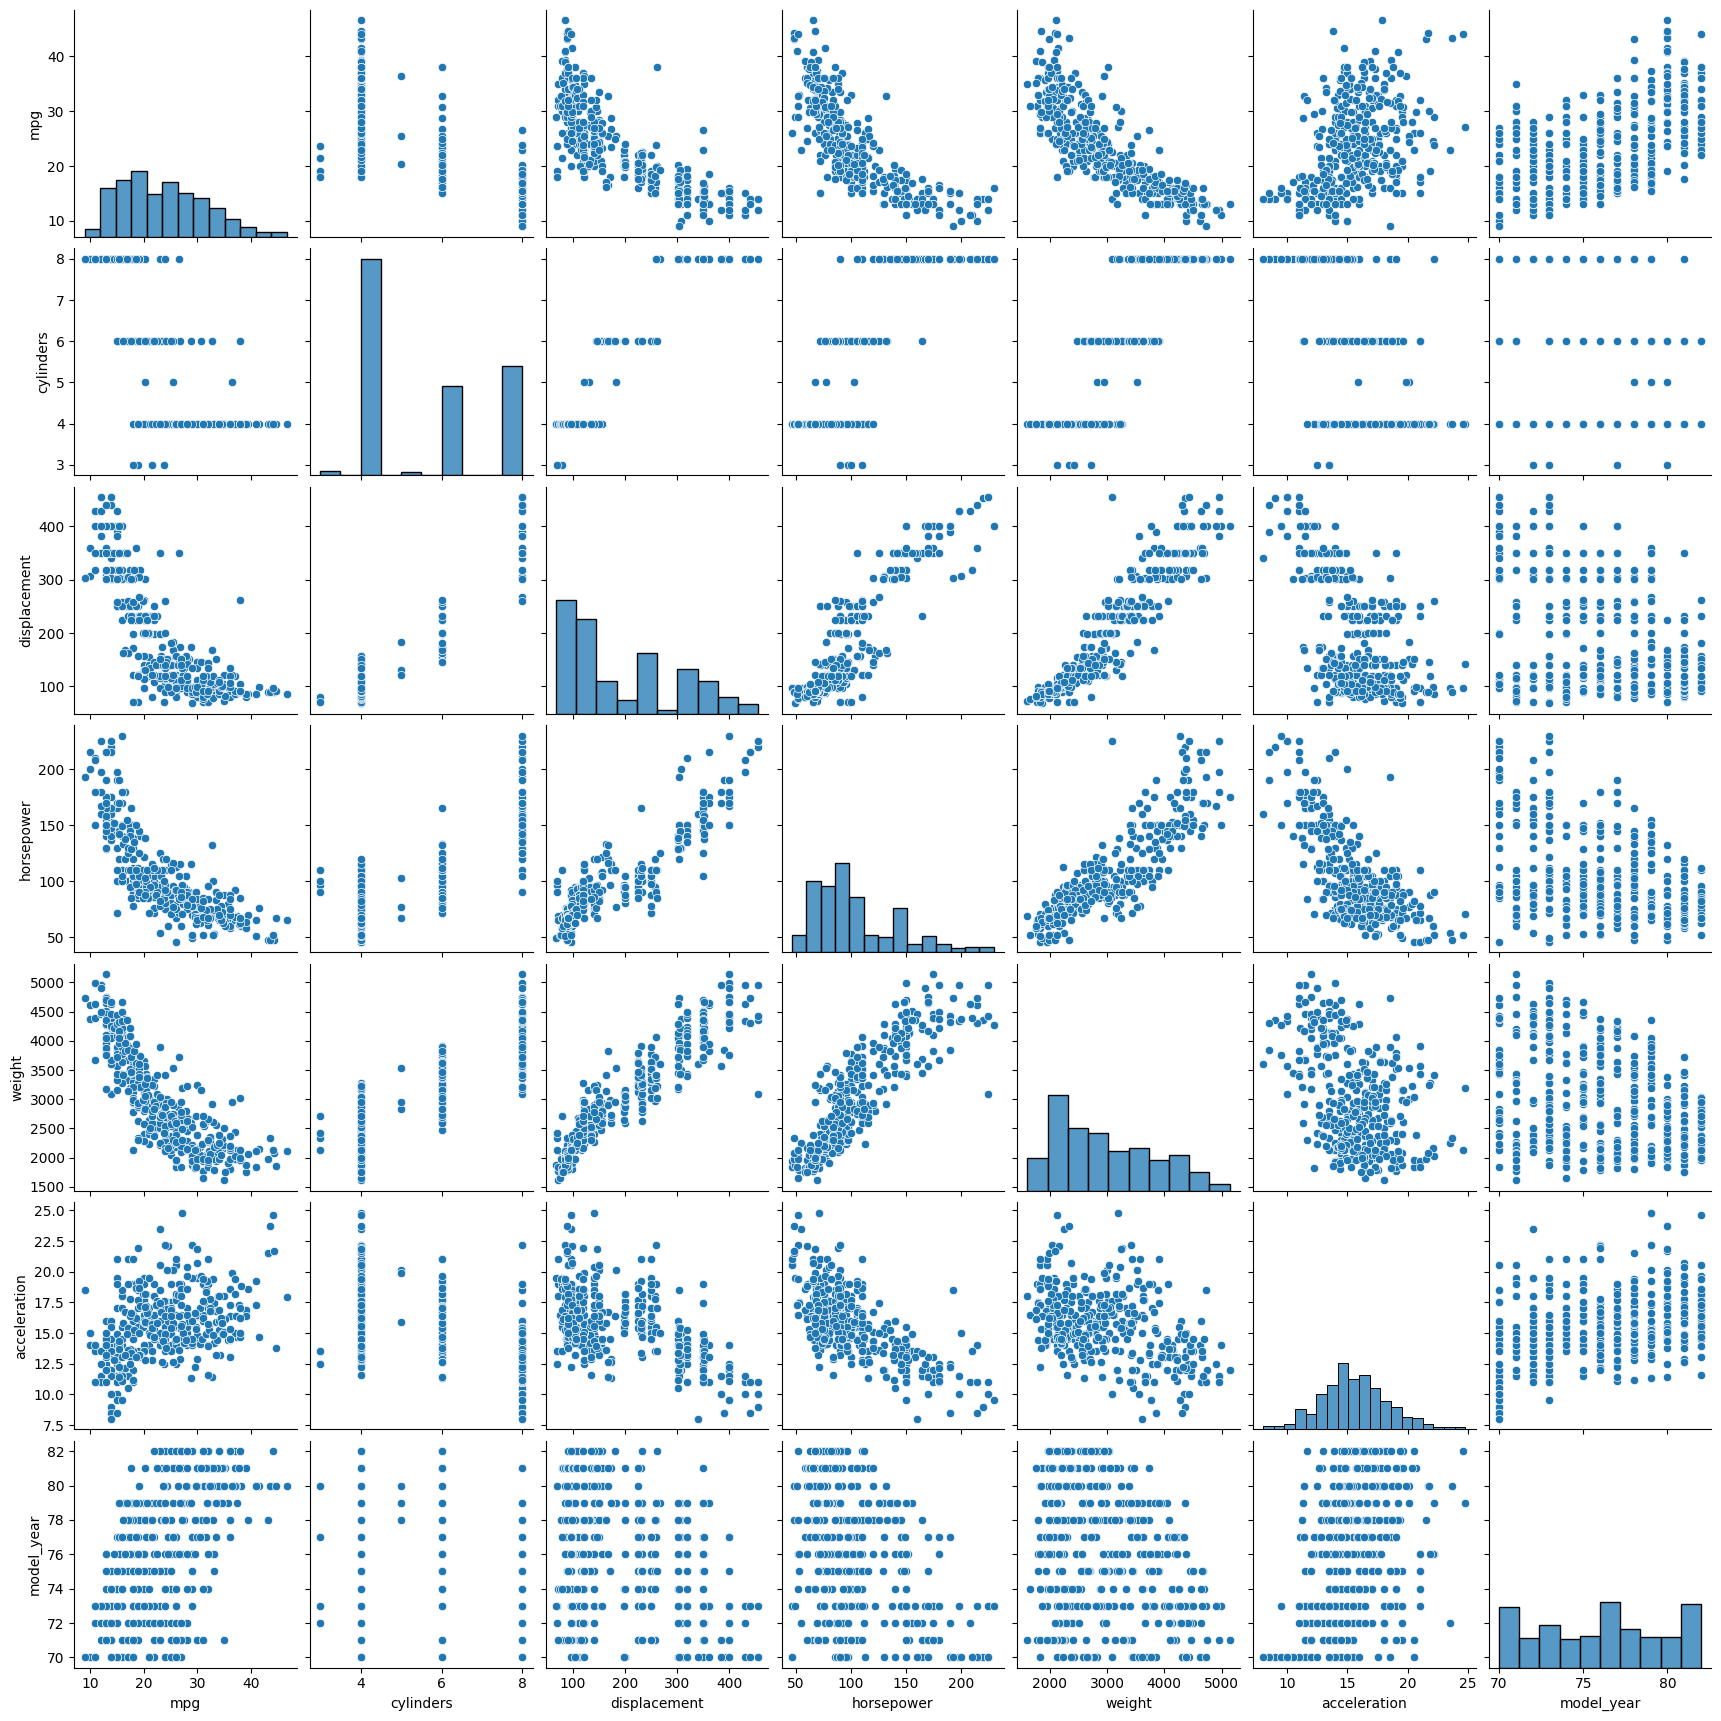

In [38]:
sns.pairplot(df_mpg)